In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

## Maximum entropy models

A maximum entropy model is one that 

$$
\begin{equation}
 H = - \sum_i p(x_i) \log \left( p(x_i) \right)
\end{equation}
$$

subject to our equally constraints. This is achieved through the method of Lagrange multipliers, which maximizes a  functional that depends on the constraints as:

$$
\begin{equation}
 \tilde{H} = - \sum_i p(x_i) \log ( p(x_i) ) + \lambda_0 ( ( \sum_i p(x_i) ) - 1 ) + \sum_k \lambda_k ( ( \sum_i p(x_i) f_k(x_i) ) - <f_k(x)>_\mathrm{emp} ).
\end{equation}
$$

The 

$$
\begin{equation}
 \frac{\delta \tilde{H}}{\delta p(x_i)} = - \log(p(x_i)) - 1 + \lambda_0 + \sum_k \lambda_k f_k(x_i)
\end{equation}
$$

Setting the gradient to zero tells us that each $p(x_i)$ must have the form:

$$
\begin{align}
 0 &= - \log(p(x_i)) - 1 + \lambda_0 + \sum_k \lambda_k f_k(x_i) \\
 \log(p(x_i)) &= -1 + \lambda_0 + \sum_k \lambda_k f_x(x_i) \\
 p(x_i) &= \frac{\exp(\sum_k \lambda_k f_x(x_i))}{Z} \\
 Z &= \sum_i \exp \left( \sum_k \lambda_k f_x(x_i) \right)
\end{align}
$$





Using 


[   5.45794111    8.14714695   -4.66150671  141.66565218 -119.23039078]
[  9.34473447e-03  -8.70053556e-03  -5.00823523e-04  -1.29178632e-03
  -7.03114727e-05]


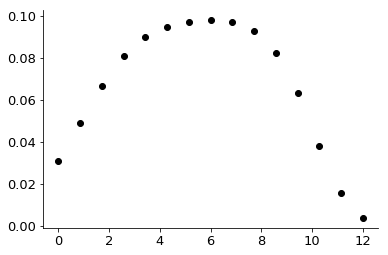

In [44]:
outcomes = np.linspace(0, 12, 15)
#constraints = np.array([2.44, 1.696, 1.116])
constraints = np.array([5.64, 8.01, -4.68])
lambdas = -1*np.zeros_like(constraints, dtype=np.float64)

q_raw = np.empty_like(outcomes)
for idx, val in enumerate(outcomes):
    q_raw[idx] = np.exp(lambdas[0]*val + lambdas[1]*(val-constraints[0])**2 + lambdas[2]*(val-constraints[0])**3 + lambdas[3]*(val-constraints[0])**4 + lambdas[4]*(val-constraints[0])**5)
# Normalize to get probabilitites
q = q_raw / q_raw.sum();

eta = 0.0000002
for i in range(250000):
    q_raw = np.empty_like(outcomes)
    for idx, val in enumerate(outcomes):
        q_raw[idx] = np.exp(lambdas[0]*val + lambdas[1]*(val-constraints[0])**2 + lambdas[2]*(val-constraints[0])**3 + lambdas[3]*(val-constraints[0])**4 + lambdas[4]*(val-constraints[0])**5)
    # Normalize to get probabilitites
    q = q_raw / q_raw.sum()
    
    E_q = np.dot(q, np.vstack([outcomes, (outcomes-constraints[0])**2, (outcomes-constraints[0])**3, (outcomes-constraints[0])**4, (outcomes-constraints[0])**5]).T)
    
    lambdas_der = constraints - E_q
    lambdas += eta*lambdas_der
    
print E_q
print lambdas
plt.plot(outcomes, q, 'ko')